In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')



%matplotlib inline

In [2]:
#Import data into a dataframe
df = pd.read_csv('survey.csv')

In [3]:
#Peek first 5 items in list
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data Cleaning

We first need to identify the data types of each column as well as if there are missing variables.

In [4]:
#Identify data types we are working with
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [ ]:
#Locate if there are any missing variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

We can see that State, Self_Employed, Work_Interference, and Comments are missing some variables. We take a look at a sample to identify the best way of approaching missing variables.

In [ ]:
#Looking at missing 'State' for the first 10 items
df[df['state'].isnull()][['Country','state']].head(10)

,Country,state
2,Canada,NaN
3,United Kingdom,NaN
7,Canada,NaN
9,Canada,NaN
11,Bulgaria,NaN
14,Canada,NaN
16,United Kingdom,NaN
19,France,NaN
29,United Kingdom,NaN
30,United Kingdom,NaN


Looking at the list, we can identify that these line items are from individuals who are not in the US. Since we are going to assess the dataset as a whole, we can ignore the state. However, 'State' will be a valuable datapoint for US-centric analysis. For now, we will indicate it as 'Non-US'.

In [ ]:
#Replace NaN in State with Non USA
df['state'].fillna('Non-USA', inplace=True)

In [ ]:
#Looking at missing 'Self Employed' for the first 10 items
df[df['self_employed'].isnull()]['self_employed'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: self_employed, dtype: object

Self employment does not appear to be any corelated to any information. For this analysis, we will assume that those who left this part blank is not self employed.

In [ ]:
df['self_employed'].fillna('No', inplace=True)

In [ ]:
#Looking at missing 'Work Interfere' for the first 10 items
df[df['work_interfere'].isnull()][['treatment','work_interfere']].head(10)

,treatment,work_interfere
19,No,NaN
26,No,NaN
37,No,NaN
38,No,NaN
41,No,NaN
46,No,NaN
47,No,NaN
51,No,NaN
52,No,NaN
54,No,NaN


Based on the question 'If you have a mental health condition, do you feel that it interferes with your work?', we can deduce that those who have no answer are those who don't have mental health conditions. For all cases that 'work interfere' is null, we can also identify that the 'treatment' column is 'No'. Therefore, we can replace NaN with 'Never'.

In [ ]:
df['work_interfere'].fillna('Never', inplace = True)

For comments, we can simply assume that NaN means they left the comment section blank.

In [ ]:
df['comments'].fillna('None', inplace=True)

Looking at our code info, we can now tell that people don't have 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        1259 non-null object
self_employed                1259 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               1259 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null o

In [ ]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
conditions = [(df['Gender']).str.contains('F'),
              (df['Gender']).str.contains('M')]
choices = ['Female', 'Male']
df['Gender'] = np.select(conditions, choices, default = 'Other')

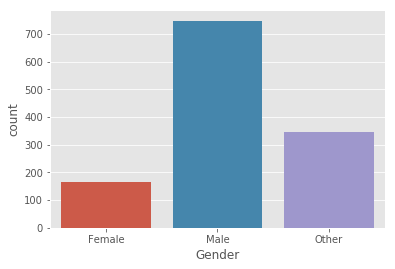

In [ ]:
gender_count = sns.countplot(df['Gender'])
plt.title = "Gender"

In [ ]:
sns.set(rc = {'figure.figsize':(15,4)})
age_count = sns.countplot(df['Age'])
plt.title = "Age"
plt.xticks(rotation=90)
plt.show()

We notice that there are outliers in the Age data. We take a look at the outliers that are outside the ages 10 and 100.

In [ ]:
df[(df['Age']>100) | (df['Age']<0)]

In [ ]:
df = df.drop([143, 364, 390, 715, 1127]).reset_index()

In [ ]:
sns.set(rc = {'figure.figsize':(15,4)})
age_count = plt.hist(df['Age'], bins = 50)
plt.xticks(rotation=90)
plt.show()

We can see that there's a huge distribution in mid-senior level that answered the survey.